In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
import pickle
emp = {1:"A",2:"B",3:"C",4:"D",5:"E"}
pickling_on = open("Emp.pickle","wb")
pickle.dump(emp, pickling_on)
pickling_on.close()

In [3]:
# Here's the dataframe that we previously used
df_rand = pd.DataFrame(np.random.randint(low=0, high=100, size=(5, 4)),
                       columns=['a', 'b', 'c', 'd'])
df_rand

,a,b,c,d
0,81,56,90,45
1,44,5,7,50
2,46,94,65,91
3,51,17,3,41
4,91,38,27,35


In [8]:
# We were able to add a column to the dataframe as follows
df_rand['e'] = pd.Series(np.random.randn(5), index=df_rand.index)
df_rand

,a,b,c,d,e
0,81,56,90,45,-0.99
1,44,5,7,50,0.96
2,46,94,65,91,-1.13
3,51,17,3,41,-0.18
4,91,38,27,35,0.75


For some, the method above might generate a warning, *"`SettingWithCopyWarning`: A value is trying to be set on a copy of a slice from a DataFrame. Try using `.loc[row_index,col_indexer] = value` instead"*. To avoid this warning, it's recommended to use `assign` (More info on [StackOverflow](https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas/12555510#12555510)).

In [11]:
df_rand = df_rand.assign(f=pd.Series(np.random.randn(5), index=df_rand.index))
df_rand # notice that `f` from above is a name of the column

,a,b,c,d,e,f
0,81,56,90,45,-0.99,-1.45
1,44,5,7,50,0.96,-1.38
2,46,94,65,91,-1.13,0.59
3,51,17,3,41,-0.18,-0.54
4,91,38,27,35,0.75,-1.34


In [12]:
df_rand = df_rand.assign(newcol=pd.Series(np.random.randn(5), index=df_rand.index))
df_rand

,a,b,c,d,e,f,newcol
0,81,56,90,45,-0.99,-1.45,-0.06
1,44,5,7,50,0.96,-1.38,-1.20
2,46,94,65,91,-1.13,0.59,-0.86
3,51,17,3,41,-0.18,-0.54,-1.18
4,91,38,27,35,0.75,-1.34,0.95


## What is the difference between pandas `.agg()` and `.apply()` function?

When working with a pandas dataframe, we may wish to compute a function on some of the data. This is often the case when one wants to compare different values between groups. Suppose we are working with the `mtcars` dataset shown below, and we wish to answer a question like

*Which type of engine has the best miles per gallon fuel efficiency?*

or

*Which type of engine performs the best?*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mtcars = pd.read_csv("https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/898a40b035f7c951579041aecbfb2149331fa9f6/mtcars.csv")

#data.rename(columns={'gdp':'log(gdp)'}, inplace=True)
mtcars.rename(columns = {"Unnamed: 0":"Name"}, inplace = True)
mtcars.head()

,Name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Mainly to answer this we may want to look at different statistics between the groups. (i.e. mean, median, variance, etc.)

We can use the pandas methods `.apply()` and `.agg()` to get these statistics by passing columns as inputs to functions like `mean`, `median`, or any function we may wish to evaulate on a grouped dataframe. 

So, one may ask what is the difference between using `.apply()` and `.agg()`?

The answer is that, the `.apply` function _applies_ a single function to a column (series), whereas the `agg` function aggregates each column (feature) for each group, so you end up with one value per column per group. What this means is that `.agg()` gives the flexibility of applying multiple functions at once, or pass a list of functions to each column, and then can run different functions at once to different columns of dataframe. So, lets see an example. 

Suppose we wish to answer our original question of *Which type of engine has the best miles per gallon fuel efficiency?*

To answer this we note that the engine type is defined by its number of cylinders (`cyl` column in the dataset). The answer to this question is then based on whichever type of engine has the most fuel efficiency. Suppose we will use three different metrics to calculate `mpg` by engine type: an average, a total, and the variance. 

Then, we can compare the types of engines visually and numerically.

First, we will do this using `.apply()`

In [87]:
average_apply = mtcars.groupby("cyl").apply(np.mean)["mpg"]
total_apply = mtcars.groupby("cyl").apply(np.sum)["mpg"]
variance_apply = mtcars.groupby("cyl").apply(np.var)["mpg"]

print("Mean mpg by number of cylinders \n",average_apply)
print("Total mpg by number of cylinders \n",total_apply)
print("Variance mpg by number of cylinders \n",variance_apply)

Mean mpg by number of cylinders 
 cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64
Total mpg by number of cylinders 
 cyl
4    293.3
6    138.2
8    211.4
Name: mpg, dtype: float64
Variance mpg by number of cylinders 
 cyl
4    18.489587
6     1.811020
8     6.085714
Name: mpg, dtype: float64


So, using `.apply()` we must apply each function separately. However, using `.agg()` we can do this all in one step as shown below.

In [88]:
mtcars.groupby("cyl")["mpg"].agg([np.mean,np.sum,np.var])

,mean,sum,var
cyl,,,
4,26.663636,293.3,20.338545
6,19.742857,138.2,2.112857
8,15.100000,211.4,6.553846


Interestingly, the results for the "var" column produce different results with `agg` as opposed to `apply`!

Additionally, we can use `.agg()` to use different function(s) on different columns by passing a dictionary of column names and a list of functions to `.agg()` of the form `{"column_name1":[function1,function2,...], "column_name2":[function3,function4,...]}`. For example, if we want to see how many car types are within each engine type group this can be done using `.agg()` shown below.

In [89]:
mtcars.groupby("cyl").agg({"mpg":[np.mean,np.sum,np.var],"Num_cars":[np.count_nonzero] })

mpg                            Name
          mean    sum        var count_nonzero
cyl                                           
4    26.663636  293.3  20.338545            11
6    19.742857  138.2   2.112857             7
8    15.100000  211.4   6.553846            14

Or if we want to answer more complicated questions like

*Which type of engine performs the best?* 

and we will say that an engine *performs best* if it has more horsepower and more fuel efficiency, then we want to know how many cars are within that class to check the accuracy of the hp and mpg.

In [90]:
perf_table = mtcars.groupby("cyl").agg({"mpg":[np.mean,np.var],"hp":[np.mean,np.var],"Num_cars":[np.count_nonzero] })
perf_table

mpg                     hp                       Name
          mean        var        mean          var count_nonzero
cyl                                                             
4    26.663636  20.338545   82.636364   438.254545            11
6    19.742857   2.112857  122.285714   588.571429             7
8    15.100000   6.553846  209.214286  2598.642857            14

And with this summary data, we can construct a visualization of perfomance by engine type.

Text(0.5, 1.0, 'Perfomance: A Tradeoff')

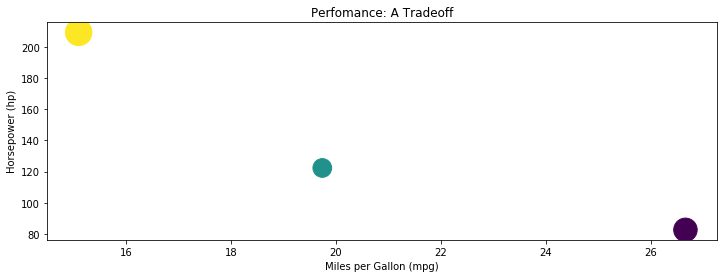

In [91]:
plt.figure(figsize=(12,4))
plt.scatter(perf_table[("mpg","mean")],
            perf_table[("hp","mean")],
            c = perf_table.index,
            s = perf_table[("Num_cars","count_nonzero")]*50)
plt.xlabel("Miles per Gallon (mpg)")
plt.ylabel("Horsepower (hp)")
plt.title("Perfomance: A Tradeoff")

We find that perfomance is a tradeoff between power and efficiency. 

In general, `.agg()` is more flexible and powerful than `.apply()` when the objective is to run a function on several different columns or to run different functions on a column, or do both of these at the same time. 